## 決策樹

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [6]:
iris.data.shape

(150, 4)

In [5]:
iris.data[0:5,]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [9]:
iris.target[0:5]

array([0, 0, 0, 0, 0])

In [18]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)

In [27]:
from sklearn import ensemble
clf2 = ensemble.RandomForestClassifier()
#clf = ensemble
clf2.fit(iris.data, iris.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [19]:
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [20]:
predicted = clf.predict(iris.data)

In [21]:
sum(predicted == iris.target) / len(iris.target)

0.95999999999999996

In [22]:
tree.export_graphviz(clf, 'tree.dot')

## 決策邊界

In [24]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn. datasets import load_iris
from sklearn import tree

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X, y)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

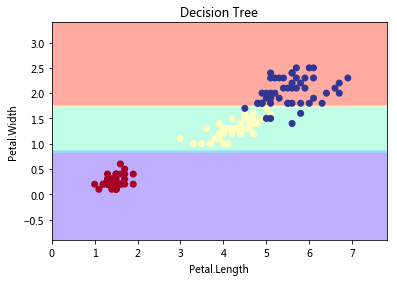

In [25]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

plt.plot()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('Decision Tree')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()


## 邏輯式回歸

In [28]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(iris.data, iris.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
predicted = clf.predict(iris.data)

In [33]:
sum(predicted == iris.target) / len(iris.target)

0.95999999999999996

## 隨機森林

In [36]:
from sklearn import ensemble
clf2 = ensemble.RandomForestClassifier()
clf2.fit(iris.data, iris.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

## 繪製邏輯式回歸的決策邊界

In [37]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

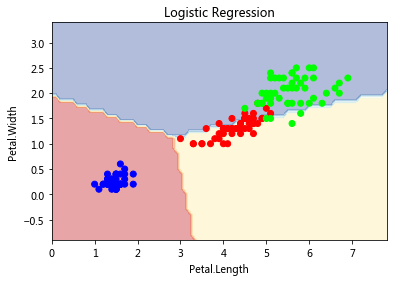

In [38]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.plot()
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y,  cmap = plt.cm.brg)
plt.title('Logistic Regression')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()



## 建立ANN

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [6]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

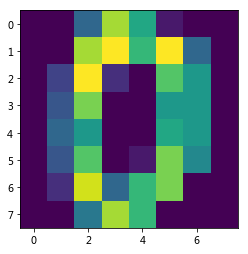

In [16]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0])
plt.show()
#plt.plt

Populating the interactive namespace from numpy and matplotlib


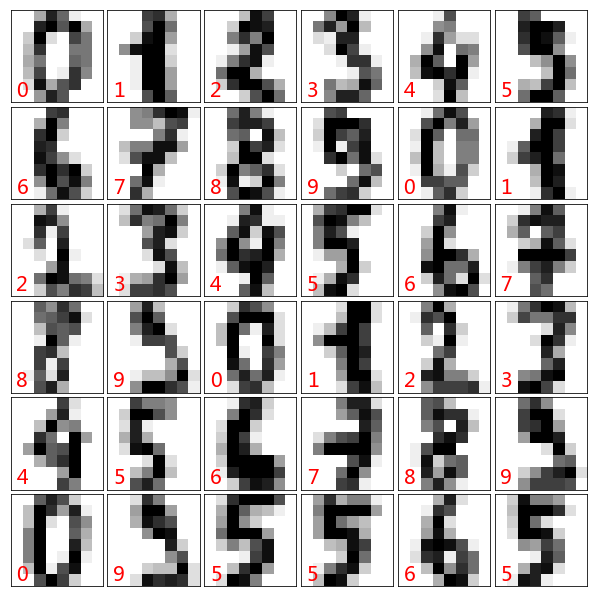

In [18]:
%pylab inline
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(36):
    ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    
    ax.text(0, 7, str(digits.target[i]), color="red", fontsize = 20)


In [20]:
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(digits.data)
X_scaled = scaler.transform(digits.data)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ..., 
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [30]:
from sklearn.neural_network import MLPClassifier
#?MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='logistic', max_iter = 1000)
mlp.fit(X_scaled,digits.target)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [31]:
predicted = mlp.predict(X_scaled)

In [32]:
sum(predicted == digits.target) / len(digits.target)

1.0

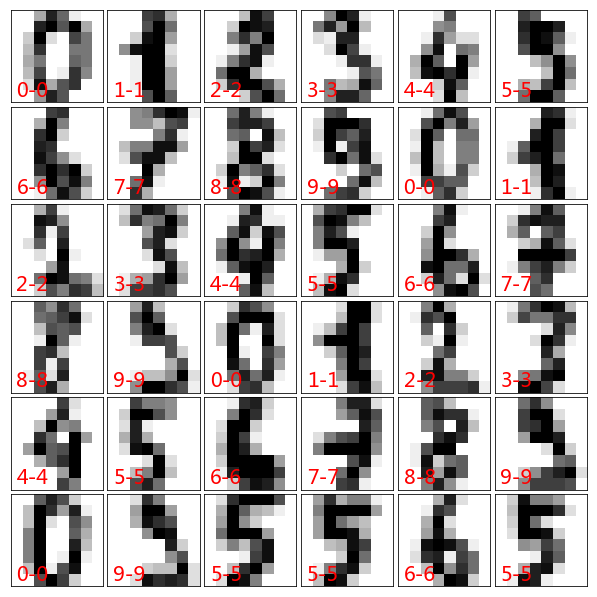

In [33]:
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(36):
    ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    
    ax.text(0, 7, str('{}-{}'.format(digits.target[i],predicted[i])), color="red", fontsize = 20)


## 支持向量機 (Support Vector Machine)

In [35]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data[0:100,[2,3]]
y = iris.target[0:100]

In [41]:
from sklearn.svm import SVC

clf1 = SVC(kernel = 'linear')
clf1.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
from sklearn.linear_model import LogisticRegression

clf2 = LogisticRegression()
clf2.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
def plot_estimator(estimator, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.plot()
    plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y,  cmap = plt.cm.brg)
    plt.xlabel('Petal.Length')
    plt.ylabel('Petal.Width')
    plt.show()

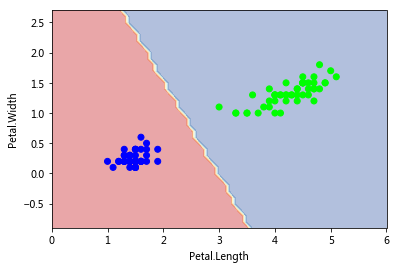

In [43]:
plot_estimator(clf1,X,y)

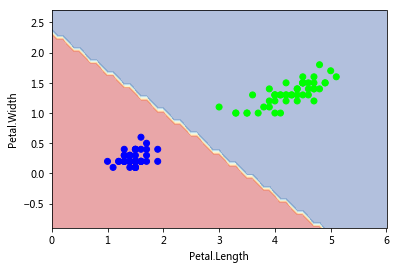

In [44]:
plot_estimator(clf2,X,y)

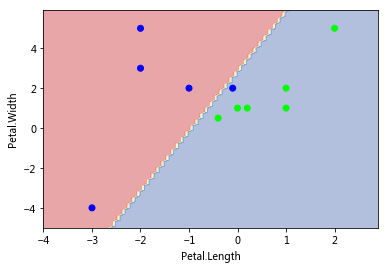

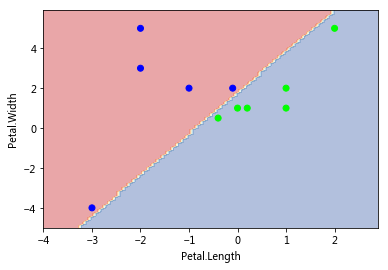

In [45]:
data = np.array([[-1,2,0],[-2,3,0],[-2,5,0],[-3,-4,0],[-0.1,2,0],[0.2,1,1],[0,1,1],[1,2,1], [1,1,1], [-0.4,0.5,1],[2,5,1]])
X = data[:, :2] 
Y = data[:,2]

# Large Margin
clf = SVC(C=1.0, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)

# Narrow Margin
clf = SVC(C=100000, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)


In [52]:

from itertools import product
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.svm import SVC

iris = load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [53]:
clf1 = SVC(kernel="rbf")
clf1.fit(X, y)

clf2 = SVC(kernel="poly")
clf2.fit(X, y)

clf3 = SVC(kernel="linear")
clf3.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'title', 'clf', 'product']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


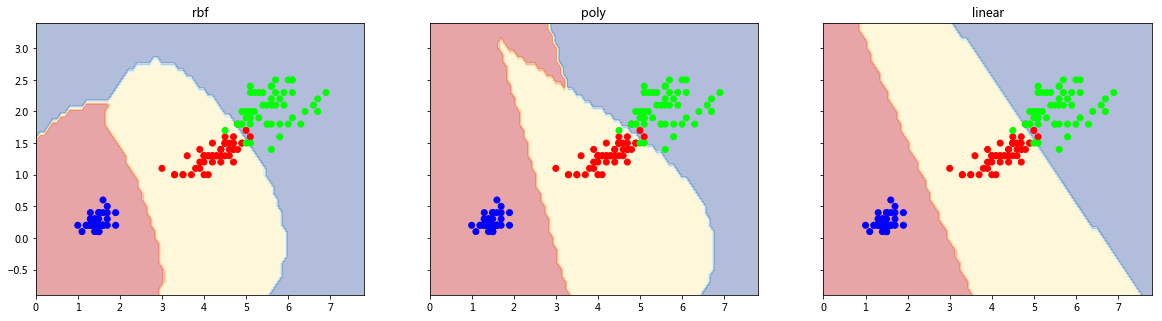

In [54]:
%pylab inline
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20, 5))

for idx, clf, title in zip([0,1,2],[clf1, clf2, clf3], ['rbf', 'poly', 'linear']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    axarr[idx].scatter(X[:, 0], X[:, 1], c=y,  cmap = plt.cm.brg)
    axarr[idx].set_title(title)

## 隨機森林

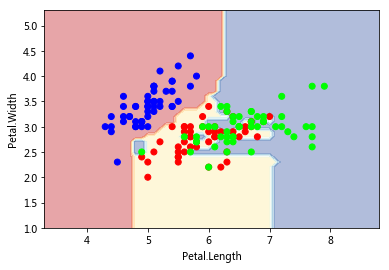

In [56]:
from sklearn.ensemble import RandomForestClassifier
iris = load_iris()
X = iris.data[:,[0,1]]
y = iris.target

clf = RandomForestClassifier(n_estimators=100, criterion="entropy")
clf.fit(X, y)
plot_estimator(clf, X, y)


In [57]:
clf1 = RandomForestClassifier(n_estimators=1, criterion="entropy")
clf1.fit(X, y)
clf2 = RandomForestClassifier(n_estimators=10, criterion="entropy")
clf2.fit(X, y)
clf3 = RandomForestClassifier(n_estimators=100, criterion="entropy")
clf3.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

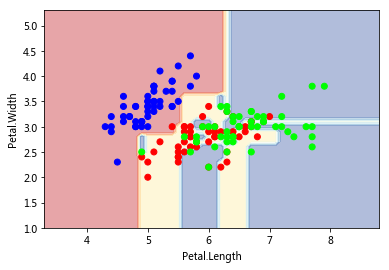

In [58]:
plot_estimator(clf1, X, y)

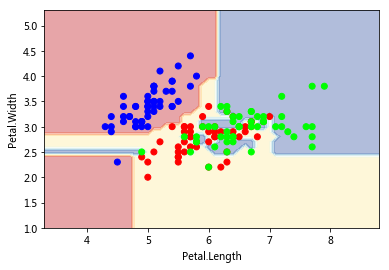

In [60]:
plot_estimator(clf2, X, y)

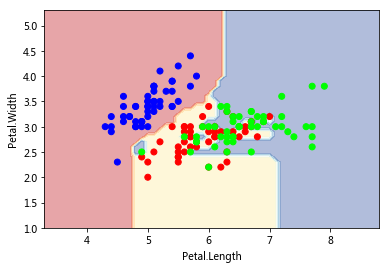

In [61]:
plot_estimator(clf3, X, y)

In [62]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = SVC(kernel="rbf")
clf1.fit(X, y)

clf2 = DecisionTreeClassifier()
clf2.fit(X, y)

clf3 = RandomForestClassifier(n_estimators=10, criterion="entropy")
clf3.fit(X, y)

clf4 = LogisticRegression()
clf4.fit(X, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

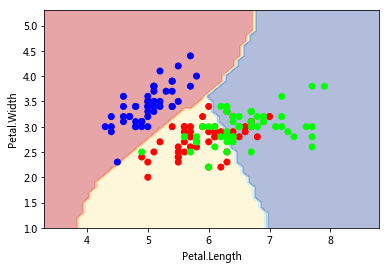

In [63]:
plot_estimator(clf1, X, y)

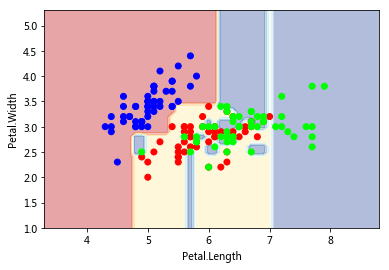

In [64]:
plot_estimator(clf2, X, y)

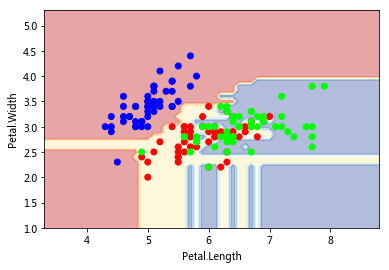

In [65]:
plot_estimator(clf3, X, y)

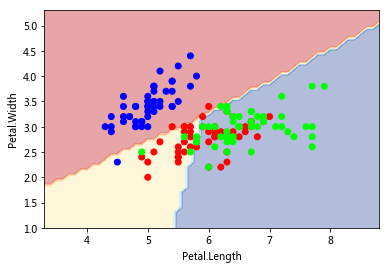

In [66]:
plot_estimator(clf4, X, y)